In [ ]:
import os
import zipfile

In [ ]:
local_zip = '/content/drive/MyDrive/concerete_crack_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/temp')
zip_ref.close()

In [ ]:
base_dir = '/content/drive/MyDrive/temp/concerete_crack_images'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training Negative pictures
train_n_dir = os.path.join(train_dir, 'Negative')

# Directory with our training Positive pictures
train_p_dir = os.path.join(train_dir, 'Positive')

In [ ]:
train_n_fnames = os.listdir(train_n_dir)
print(train_n_fnames[:10])

train_p_fnames = os.listdir(train_p_dir)
train_p_fnames.sort()
print(train_p_fnames[:10])

['13630.jpg', '1377.jpg', '6418.jpg', '7706.jpg', '8435.jpg', '15241.jpg', '3560.jpg', '11027.jpg', '5111.jpg', '10339.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg']


In [ ]:
print('total training n images:', len(os.listdir(train_n_dir)))
print('total training p images:', len(os.listdir(train_p_dir)))

total training n images: 16037
total training p images: 16070


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

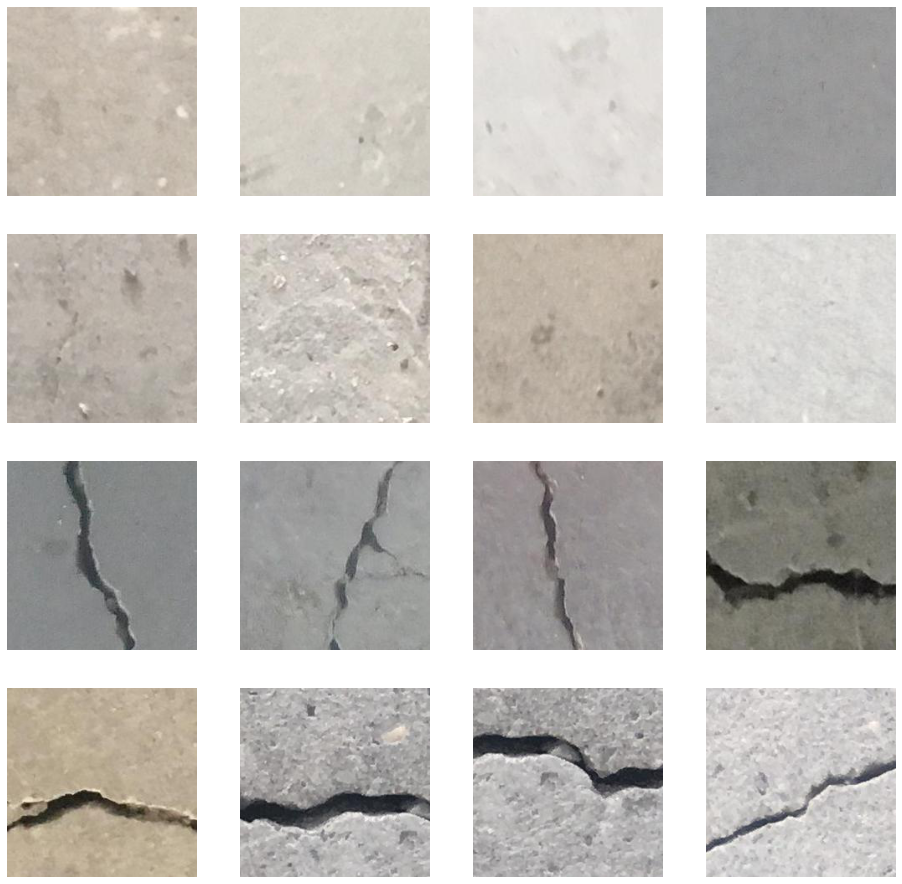

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_n_pix = [os.path.join(train_n_dir, fname) 
                for fname in train_n_fnames[pic_index-8:pic_index]]
next_p_pix = [os.path.join(train_p_dir, fname) 
                for fname in train_p_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_n_pix+next_p_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        1849

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')



Found 32107 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,  # 2000 images = batch_size * steps
      epochs=10,
      verbose=2)

Epoch 1/10
10/10 - 49s - loss: 0.1610 - acc: 0.9500 - 49s/epoch - 5s/step
Epoch 2/10
10/10 - 48s - loss: 0.1453 - acc: 0.9600 - 48s/epoch - 5s/step
Epoch 3/10
10/10 - 49s - loss: 0.1213 - acc: 0.9650 - 49s/epoch - 5s/step
Epoch 4/10
10/10 - 47s - loss: 0.0562 - acc: 0.9850 - 47s/epoch - 5s/step
Epoch 5/10
10/10 - 47s - loss: 0.4476 - acc: 0.8900 - 47s/epoch - 5s/step
Epoch 6/10
10/10 - 43s - loss: 0.0787 - acc: 0.9800 - 43s/epoch - 4s/step
Epoch 7/10
10/10 - 46s - loss: 0.2060 - acc: 0.9550 - 46s/epoch - 5s/step
Epoch 8/10
10/10 - 46s - loss: 0.2783 - acc: 0.9200 - 46s/epoch - 5s/step
Epoch 9/10
10/10 - 46s - loss: 0.1247 - acc: 0.9300 - 46s/epoch - 5s/step
Epoch 10/10
10/10 - 47s - loss: 0.1430 - acc: 0.9550 - 47s/epoch - 5s/step


In [ ]:
TestData = os.listdir(validation_dir)
len(TestData)

7894

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [ ]:
path = os.path.join(validation_dir, TestData[0])

In [ ]:
import pandas as pd
df = pd.DataFrame(columns = ['image_id', 'predicted_class'])

print(df)

Empty DataFrame
Columns: [image_id, predicted_class]
Index: []


In [ ]:
for i in range(0, 3500):
  path = os.path.join(validation_dir, TestData[i])
  _image = load_image(path)
  result = model.predict(_image)
  if result[0]>0.5:
    df = df.append({'image_id' : TestData[i], 'predicted_class' : 'Cracked'}, 
                ignore_index = True)
  else:
    df = df.append({'image_id' : TestData[i], 'predicted_class' : 'Not_Cracked'}, 
                ignore_index = True)

In [ ]:
for i in range(6288, 7894):
  path = os.path.join(validation_dir, TestData[i])
  _image = load_image(path)
  result = model.predict(_image)
  if result[0]>0.5:
    df = df.append({'image_id' : TestData[i], 'predicted_class' : 'Cracked'}, 
                ignore_index = True)
  else:
    df = df.append({'image_id' : TestData[i], 'predicted_class' : 'Not_Cracked'}, 
                ignore_index = True)

In [ ]:
df

,image_id,predicted_class
0,437478393362764.png,Cracked
1,899050930737803.png,Not_Cracked
2,1240904029179342.png,Not_Cracked
3,387659298710006.png,Not_Cracked
4,1116342319491701.png,Cracked
...,...,...
7887,214544258015360.png,Cracked
7888,1413253484672458.png,Not_Cracked
7889,1168738571140431.png,Cracked
7890,182459211229196.png,Cracked


In [ ]:
df.to_csv('/content/drive/MyDrive/CrackSurfaceResults.csv')

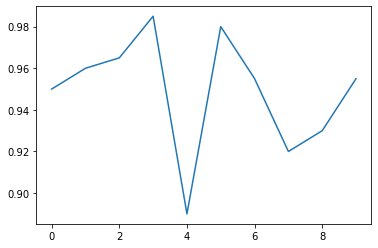

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
#val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
#val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
#plt.plot(epochs, val_acc)
#plt.title('Training and validation accuracy')

#plt.figure()

# Plot training and validation loss per epoch
#plt.plot(epochs, loss)
#plt.plot(epochs, val_loss)
#plt.title('Training and validation loss')

In [ ]:
acc = history.history['acc']
acc

[0.949999988079071,
 0.9599999785423279,
 0.9649999737739563,
 0.9850000143051147,
 0.8899999856948853,
 0.9800000190734863,
 0.9549999833106995,
 0.9200000166893005,
 0.9300000071525574,
 0.9549999833106995]